<a href="https://colab.research.google.com/github/rubyfipps/math-5630-6630.homework.1/blob/main/intermediate_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df= pd.read_csv('/content/sample_data/Galton_Height_Data.csv')

In [5]:
df.head()

,family,father,mother,sex,height,nkids
0,1,78.5,67.0,M,73.2,4
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4
3,1,78.5,67.0,F,69.0,4
4,2,75.5,66.5,M,73.5,4


Objective 1: Examine the relationship between parental height and the height of their adult children.
- Calculate the father and mothers average height.
- Creat scatter plots for sons and daughters.

In [16]:
df['MidParent'] = (df['father'] + df['mother']) / 2

print(df.head())

  family  father  mother sex  height  nkids  outlier  MidParent
0      1    78.5    67.0   M    73.2      4    False      72.75
1      1    78.5    67.0   F    69.2      4    False      72.75
2      1    78.5    67.0   F    69.0      4    False      72.75
3      1    78.5    67.0   F    69.0      4    False      72.75
4      2    75.5    66.5   M    73.5      4    False      71.00


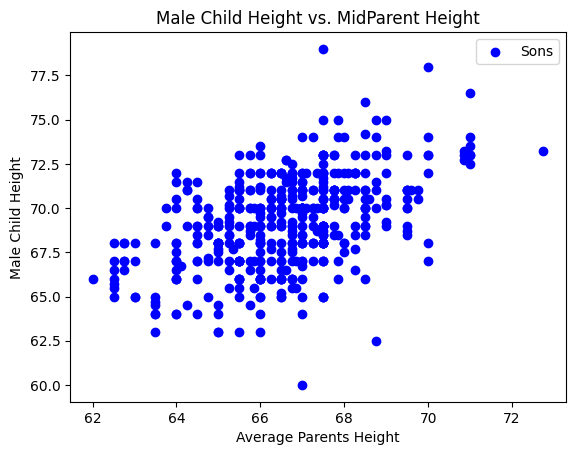

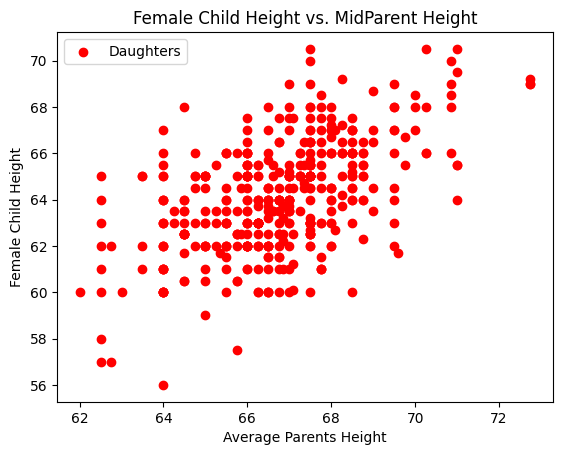

In [28]:
import matplotlib.pyplot as plt
male_df = df[df['sex'] == 'M']
female_df = df[df['sex'] == 'F']

#Sons:
plt.scatter(male_df['MidParent'], male_df['height'], label='Sons', color='blue')
plt.xlabel('Average Parents Height')
plt.ylabel('Male Child Height')
plt.title('Male Child Height vs. MidParent Height')
plt.legend()
plt.show()

#Daughters:
plt.scatter(female_df['MidParent'], female_df['height'], label='Daughters', color='red')
plt.xlabel('Average Parents Height')
plt.ylabel('Female Child Height')
plt.title('Female Child Height vs. MidParent Height')
plt.legend()
plt.show()

Objective 2: Identify potential differences in height inheritance between adult male and adult female children.
- Summary statistics for male and female children.
- Linear regression for average parents height and sons and average parents height and daughters.


Mean, median, mode, and standard deviation for male and female children:




In [24]:
male_df = df[df['sex'] == 'M']
female_df = df[df['sex'] == 'F']

# Male children
male_mean = male_df['height'].mean()
male_median = male_df['height'].median()
male_mode = male_df['height'].mode()[0]
male_std_dev = male_df['height'].std()

# Female children
female_mean = female_df['height'].mean()
female_median = female_df['height'].median()
female_mode = female_df['height'].mode()[0]
female_std_dev = female_df['height'].std()

print("Male Children:")
print("Mean:", male_mean)
print("Median:", male_median)
print("Mode:", male_mode)
print("Standard Deviation:", male_std_dev)

print("\nFemale Children:")
print("Mean:", female_mean)
print("Median:", female_median)
print("Mode:", female_mode)
print("Standard Deviation:", female_std_dev)

Male Children:
Mean: 69.22881720430108
Median: 69.2
Mode: 70.0
Standard Deviation: 2.6315942826866188

Female Children:
Mean: 64.11016166281756
Median: 64.0
Mode: 65.0
Standard Deviation: 2.370319602944069


Finding any outliers within the data:

In [25]:
male_df = df[df['sex'] == 'M']
female_df = df[df['sex'] == 'F']

def find_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

male_outliers = find_outliers_iqr(male_df['height'])

female_outliers = find_outliers_iqr(female_df['height'])

print("Outliers for Male Children's Heights:", male_outliers)
print("\nOutliers for Female Children's Heights:", female_outliers)

Outliers for Male Children's Heights: 22     76.5
125    78.0
288    79.0
478    60.0
Name: height, dtype: float64

Outliers for Female Children's Heights: 26     70.5
28     70.5
100    70.5
672    56.0
779    57.5
821    57.0
889    57.0
Name: height, dtype: float64


Mean, median, mode, and standard deviation with the outliers removed:

In [27]:
male_df = df[df['sex'] == 'M']
female_df = df[df['sex'] == 'F']

def find_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

male_outliers = find_outliers_iqr(male_df['height'])
female_outliers = find_outliers_iqr(female_df['height'])

male_df_filtered = male_df[~male_df['height'].isin(male_outliers)]
female_df_filtered = female_df[~female_df['height'].isin(female_outliers)]

male_mean = male_df_filtered['height'].mean()
male_median = male_df_filtered['height'].median()
male_mode = male_df_filtered['height'].mode()[0]
male_std_dev = male_df_filtered['height'].std()

female_mean = female_df_filtered['height'].mean()
female_median = female_df_filtered['height'].median()
female_mode = female_df_filtered['height'].mode()[0]
female_std_dev = female_df_filtered['height'].std()

print("Male Children (without outliers):")
print("Mean:", male_mean)
print("Median:", male_median)
print("Mode:", male_mode)
print("Standard Deviation:", male_std_dev)

print("\nFemale Children (without outliers):")
print("Mean:", female_mean)
print("Median:", female_median)
print("Mode:", female_mode)
print("Standard Deviation:", female_std_dev)

Male Children (without outliers):
Mean: 69.19284164859002
Median: 69.2
Mode: 70.0
Standard Deviation: 2.511835625957008

Female Children (without outliers):
Mean: 64.1330985915493
Median: 64.0
Mode: 65.0
Standard Deviation: 2.2196254638268575


Simple Linear Regression:

In [31]:
import statsmodels.api as sm

df['MidParent'] = (df['father'] + df['mother']) / 2

X = sm.add_constant(df['MidParent'])
y = df['height']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 height   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     107.3
Date:                Fri, 21 Mar 2025   Prob (F-statistic):           7.82e-24
Time:                        16:51:41   Log-Likelihood:                -2368.9
No. Observations:                 898   AIC:                             4742.
Df Residuals:                     896   BIC:                             4751.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.1488      4.308      5.142      0.0

Multiple Regression with Gender Interaction:

In [34]:
df['GenderCode'] = df['sex'].map({'M': 1, 'F': 0})  # Encode gender

df['MidParent_Gender'] = df['MidParent'] * df['GenderCode']  # Interaction term

X_interact = df[['MidParent', 'GenderCode', 'MidParent_Gender']]
X_interact = sm.add_constant(X_interact)

model_interact = sm.OLS(df['height'], X_interact).fit()
print(model_interact.summary())

                            OLS Regression Results                            
Dep. Variable:                 height   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     525.8
Date:                Fri, 21 Mar 2025   Prob (F-statistic):          7.83e-197
Time:                        17:03:07   Log-Likelihood:                -1963.2
No. Observations:                 898   AIC:                             3934.
Df Residuals:                     894   BIC:                             3954.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               15.9671      3.897  

ANOVA table:

In [36]:
import statsmodels.formula.api as smf

model = smf.ols('height ~ C(sex)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

               sum_sq     df           F         PR(>F)
C(sex)    5874.573234    1.0  933.184603  5.175573e-141
Residual  5640.489138  896.0         NaN            NaN
